In [16]:
!pip install ipywidgets
from __future__ import print_function
from ipywidgets import interact,FloatSlider,IntSlider,interactive,HBox
import ipywidgets as widgets

In [5]:
import io
from itertools import count
import pymysql
import getpass
import pandas as pd

import networkx as nx
from networkx import Graph as NXGraph
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import collections

from IPython.display import display, Image

from ipywidgets import interact

Acho que vale a pena deixar o modelo do banco para termos as conexões em mente

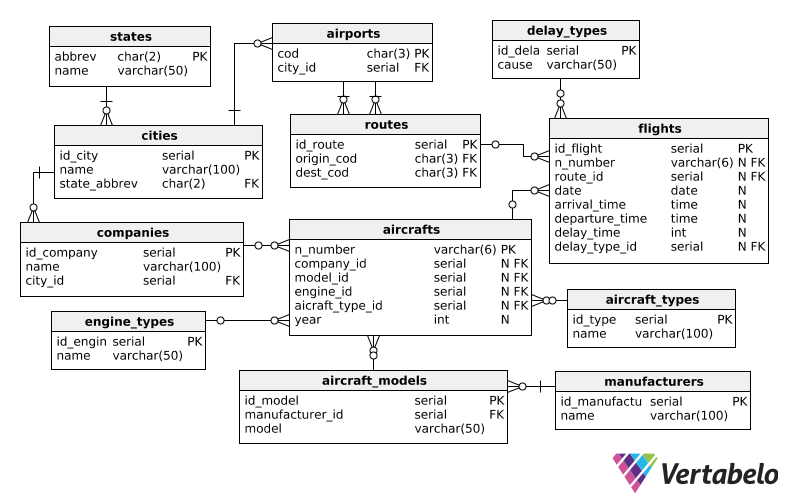

Quantidade de aeronaves por Companhia

In [9]:
conn = pymysql.connect(host = 'localhost',
                       user = 'root', 
                       passwd = '#IGt361320', 
                       database = 'flights') # só muda aqui para flights / usa_flights

cur = conn.cursor()

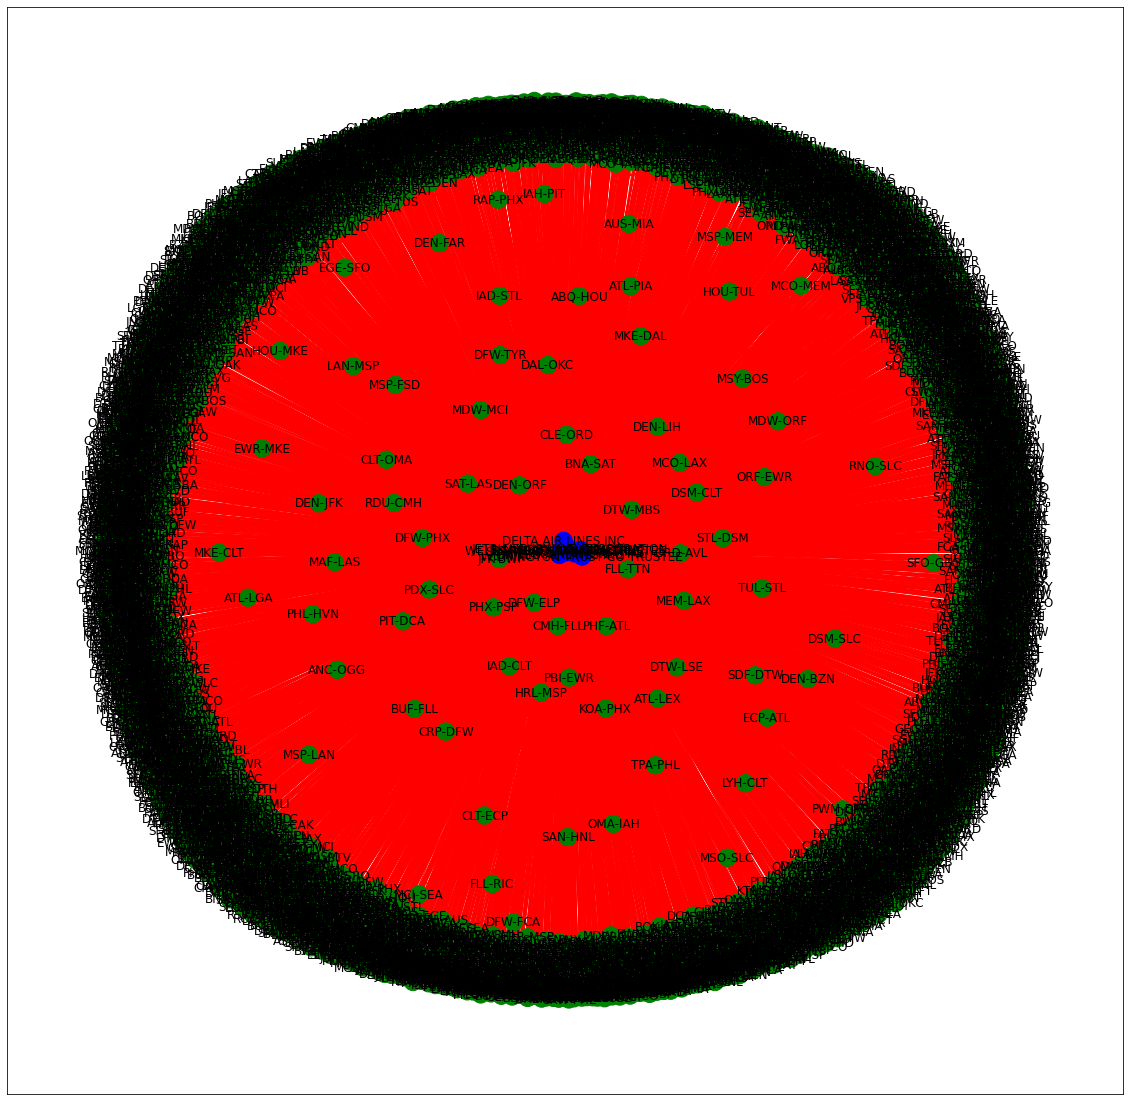

In [17]:
@interact(DELTA = True, 
          UNITED = True,
          AMERICAN = True,
          WELLS = True,
          SOUTHWEST = True,
          SKY = True,
          WILMIGAN = True,
          BANK = True,
          JETBLUE = True,
          ALASKA = True)
def graph(DELTA, UNITED, AMERICAN, WELLS, SOUTHWEST, SKY, WILMIGAN, BANK, JETBLUE, ALASKA):
    delta = "Companies.name = 'DELTA AIR LINES INC'"
    united = "Companies.name = 'UNITED AIRLINES INC'"
    american = "Companies.name = 'AMERICAN AIRLINES INC'"
    wells = "Companies.name = 'WELLS FARGO BANK NA TRUSTEE'"
    southwest = "Companies.name = 'SOUTHWEST AIRLINES INC'"
    sky = "Companies.name = 'SKY WEST AIRLINES INC'"
    wilmigan = "Companies.name = 'WILMINGTON TRUST CO TRUSTEE'"
    bank = "Companies.name = 'BANK OF UTAH TRUSTEE'"
    jetblue = "Companies.name = 'JETBLUE AIRWAYS CORPORATION'"
    alaska = "Companies.name = 'ALASKA AIRLINES INC'"
    
    include = []
    if DELTA:
        include.append(delta)
    if UNITED:
        include.append(united)
    if AMERICAN:
        include.append(american)
    if WELLS:
        include.append(wells)
    if SOUTHWEST:
        include.append(southwest)
    if SKY:
        include.append(sky)
    if WILMIGAN:
        include.append(wilmigan)
    if BANK:
        include.append(bank)
    if JETBLUE:
        include.append(jetblue)
    if ALASKA:
        include.append(alaska)
    
    if len(include) == 0:
        include = [delta, united, american, wells, southwest, sky, wilmigan, bank, jetblue, alaska]
    
    where = ""
    
    for k in include:
        if k == include[-1]:
            where += k
        else:
            where += k
            where += " OR "
    
    query = '''
    SELECT Companies.name AS Companny,
           CONCAT(Routes.Departure_Airport_id,'-', Routes.Arrival_Airport_id) AS Route,
           COUNT(Aircrafts.N_Number) AS Flights
    FROM Flights
    INNER JOIN Aircrafts ON Aircrafts.n_number = Flights.Aircrafts_id
    INNER JOIN Routes ON Flights.Route_id = Routes.id_route
    INNER JOIN Companies ON Companies.id_company = Aircrafts.Companys_id
    WHERE {0}
    GROUP BY Companies.name, Routes.Departure_Airport_id, Routes.Arrival_Airport_id
    ORDER BY Flights DESC
    ;
    '''.format(where)
    
    conn = pymysql.connect(host = 'localhost',
                           user = 'root', 
                           passwd = '#IGt361320', 
                           database = 'flights')

    
    
    df = pd.read_sql_query(query, conn)
    G = nx.DiGraph()
    for ind in df.index:
        if df.loc[ind, 'Flights'] >= 100:
            G.add_node(df.loc[ind, 'Companny'], color = 'blue')
            G.add_node(df.loc[ind, 'Route'], color = 'green')
            G.add_edge(df.loc[ind, 'Companny'], df.loc[ind, 'Route'],
                       color='red')


    fig, ax = plt.subplots(figsize=(20,20))
    pos = nx.spring_layout(G, scale=1)
    
    nx.draw_networkx(G,
                     pos = pos,
                     ax = ax,
                     node_color = [nx.get_node_attributes(G,'color')[g] for g in G.nodes()],
                     edge_color = [nx.get_edge_attributes(G,'color')[g] for g in G.edges()],)

    plt.show()
         

In [18]:
def graph(DELTA, UNITED, AMERICAN, WELLS, SOUTHWEST, SKY, WILMIGAN, BANK, JETBLUE, ALASKA):
    delta = "Companies.name = 'DELTA AIR LINES INC'"
    united = "Companies.name = 'UNITED AIRLINES INC'"
    american = "Companies.name = 'AMERICAN AIRLINES INC'"
    wells = "Companies.name = 'WELLS FARGO BANK NA TRUSTEE'"
    southwest = "Companies.name = 'SOUTHWEST AIRLINES INC'"
    sky = "Companies.name = 'SKY WEST AIRLINES INC'"
    wilmigan = "Companies.name = 'WILMINGTON TRUST CO TRUSTEE'"
    bank = "Companies.name = 'BANK OF UTAH TRUSTEE'"
    jetblue = "Companies.name = 'JETBLUE AIRWAYS CORPORATION'"
    alaska = "Companies.name = 'ALASKA AIRLINES INC'"
    
    include = []
    if DELTA:
        include.append(delta)
    if UNITED:
        include.append(united)
    if AMERICAN:
        include.append(american)
    if WELLS:
        include.append(wells)
    if SOUTHWEST:
        include.append(southwest)
    if SKY:
        include.append(sky)
    if WILMIGAN:
        include.append(wilmigan)
    if BANK:
        include.append(bank)
    if JETBLUE:
        include.append(jetblue)
    if ALASKA:
        include.append(alaska)
    
    if len(include) == 0:
        include = [delta, united, american, wells, southwest, sky, wilmigan, bank, jetblue, alaska]
    
    where = ""
    
    for k in include:
        if k == include[-1]:
            where += k
        else:
            where += k
            where += " OR "
    
    query = '''
    SELECT Companies.name AS Companny,
           CONCAT(Routes.Departure_Airport_id,'-', Routes.Arrival_Airport_id) AS Route,
           COUNT(Aircrafts.N_Number) AS Flights
    FROM Flights
    INNER JOIN Aircrafts ON Aircrafts.n_number = Flights.Aircrafts_id
    INNER JOIN Routes ON Flights.Route_id = Routes.id_route
    INNER JOIN Companies ON Companies.id_company = Aircrafts.Companys_id
    WHERE {0}
    GROUP BY Companies.name, Routes.Departure_Airport_id, Routes.Arrival_Airport_id
    ORDER BY Flights DESC
    ;
    '''.format(where)
    
    conn = pymysql.connect(host = 'localhost',
                           user = 'root', 
                           passwd = 'qwerty123', 
                           database = 'usa_flights')

    
    
    df = pd.read_sql_query(query, conn)
    G = nx.DiGraph()
    for ind in df.index:
        if df.loc[ind, 'Flights'] >= 100:
            G.add_node(df.loc[ind, 'Companny'], color = 'blue')
            G.add_node(df.loc[ind, 'Route'], color = 'green')
            G.add_edge(df.loc[ind, 'Companny'], df.loc[ind, 'Route'],
                       color='red')


    fig, ax = plt.subplots(figsize=(20,20))
    pos = nx.spring_layout(G, scale=1)
    
    nx.draw_networkx(G,
                     pos = pos,
                     ax = ax,
                     node_color = [nx.get_node_attributes(G,'color')[g] for g in G.nodes()],
                     edge_color = [nx.get_edge_attributes(G,'color')[g] for g in G.edges()],)

    plt.show()

DELTA = True 
UNITED = True
AMERICAN = True
WELLS = True
SOUTHWEST = True
SKY = True
WILMIGAN = True
BANK = True
JETBLUE = True
ALASKA = True

ip = interactive(graph, DELTA = DELTA, UNITED = UNITED, AMERICAN = AMERICAN, WELLS = WELLS,
                 SOUTHWEST = SOUTHWEST, SKY = SKY, WILMIGAN = WILMIGAN, BANK = BANK,
                 JETBLUE = JETBLUE, ALASKA = ALASKA)
display(HBox(ip.children[0:5]))
display(HBox(ip.children[5:-1]))
display(ip.children[-1])

Output()